In [18]:
import numpy as np
import cv2
import json
from mrcnn import visualize
import matplotlib.pyplot as plt

In [19]:
path_to_results = '/home/incendio/Desktop/ycbv_results/results.json'
gt_path = '/home/incendio/Desktop/ycbv_results/gt.json'
with open(path_to_results, 'r') as f:
    results = json.load(f)
    
with open(gt_path, 'r') as f:
    gt_results = json.load(f)

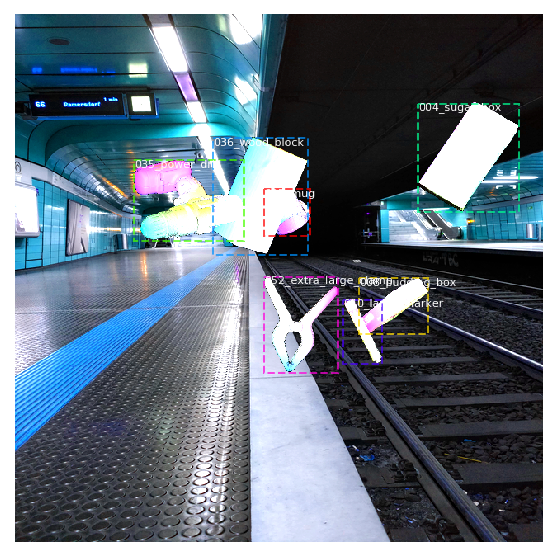

In [20]:
class_names = ['background', '002_master_chef_can', '003_cracker_box',
               '004_sugar_box', '005_tomato_soup_can', '006_mustard_bottle',
               '007_tuna_fish_can', '008_pudding_box', '009_gelatin_box',
               '010_potted_meat_can', '011_banana', '019_pitcher_base',
               '021_bleach_cleanser', '024_bowl',
               '025_mug', '035_power_drill',
               '036_wood_block', '037_scissors',
               '040_large_marker', '051_large_clamp',
               '052_extra_large_clamp', '061_foam_brick']

img_path = '/home/incendio/Desktop/ycbv_results/original_image.png'
img = cv2.imread(img_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gt = gt_results
gt_box = np.array(gt['rois'])
gt_class_id = np.array(gt['class_ids'])
gt_mask = np.array(gt['masks'])
# print(gt_mask[0, :, :, :])
# gt_mask
gt_mask = (gt_mask * 255).astype(np.uint8)
visualize.display_rgb_instances(image, gt_box, gt_mask, gt_class_id, class_names, figsize=(10, 10))

(640, 640, 6)
yes


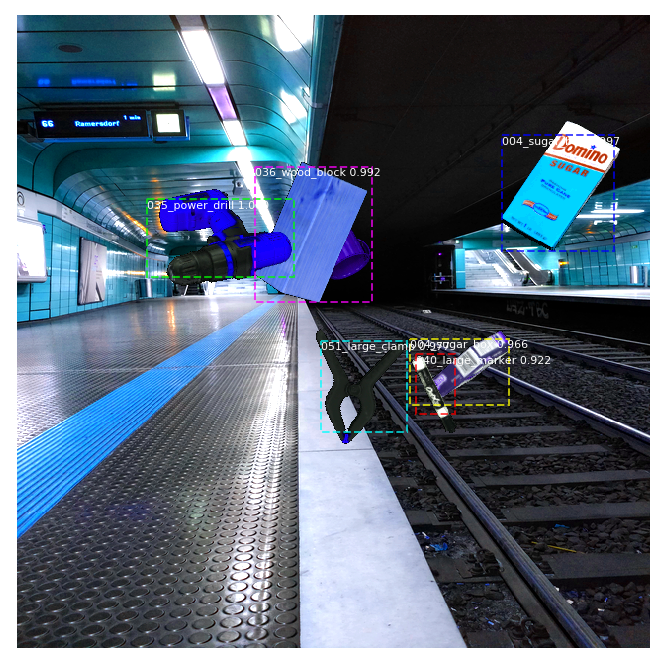

In [25]:
r = results
rois = np.array(r['rois'])
class_ids = np.array(r['class_ids'])
masks = np.array(r['masks'])
masks = (masks * 255).astype(np.uint8)
print(masks.shape)
if masks.all() == 0:
    print('yes')
visualize.display_rgb_instances(image, rois, masks, class_ids, class_names, r['scores'], figsize=(12, 12), show_mask=False)